In [1]:
# Reading the personality dataset with path of downloaded file.
import pandas as pd
personality=pd.read_csv("C:\\Users\\hp\\Downloads\\personality_dataset.csv")
# can view attributes/features using columns.
print(personality.columns)
# can view first few rows using head.
personality.head()

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [2]:
# Describing basic statistics.
personality.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [3]:
#gives information of dataset.
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
# Counts total missing values for each attribute.
# even if we run without assining we get output but by assining it to a variable we can use it in future.
missing_values=personality.isnull().sum()
print(f"total missing values for each attribute: \n{missing_values}")
# Checking for missing value percentage to determine wether to drop the missing value or not.
missing_percentage=(missing_values/len(personality))*100
print(f"missing percentage: {missing_percentage}")

total missing values for each attribute: 
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64
missing percentage: Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64


In [5]:
#droping missing values as there number is less and does't effect much.
#using dropna
personality_clean=personality.dropna(inplace=False)
print(f"Original dataset shape:{personality.shape}")
print(f"Cleaned dataset shape:{personality_clean.shape}")

Original dataset shape:(2900, 8)
Cleaned dataset shape:(2477, 8)


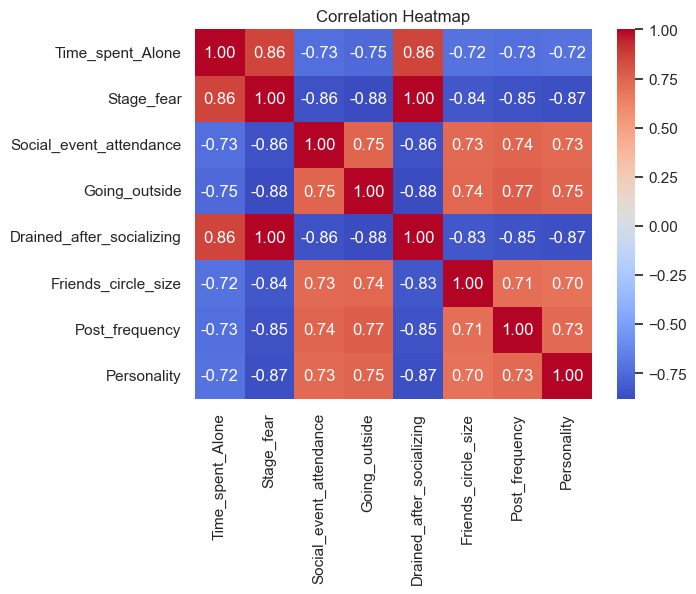

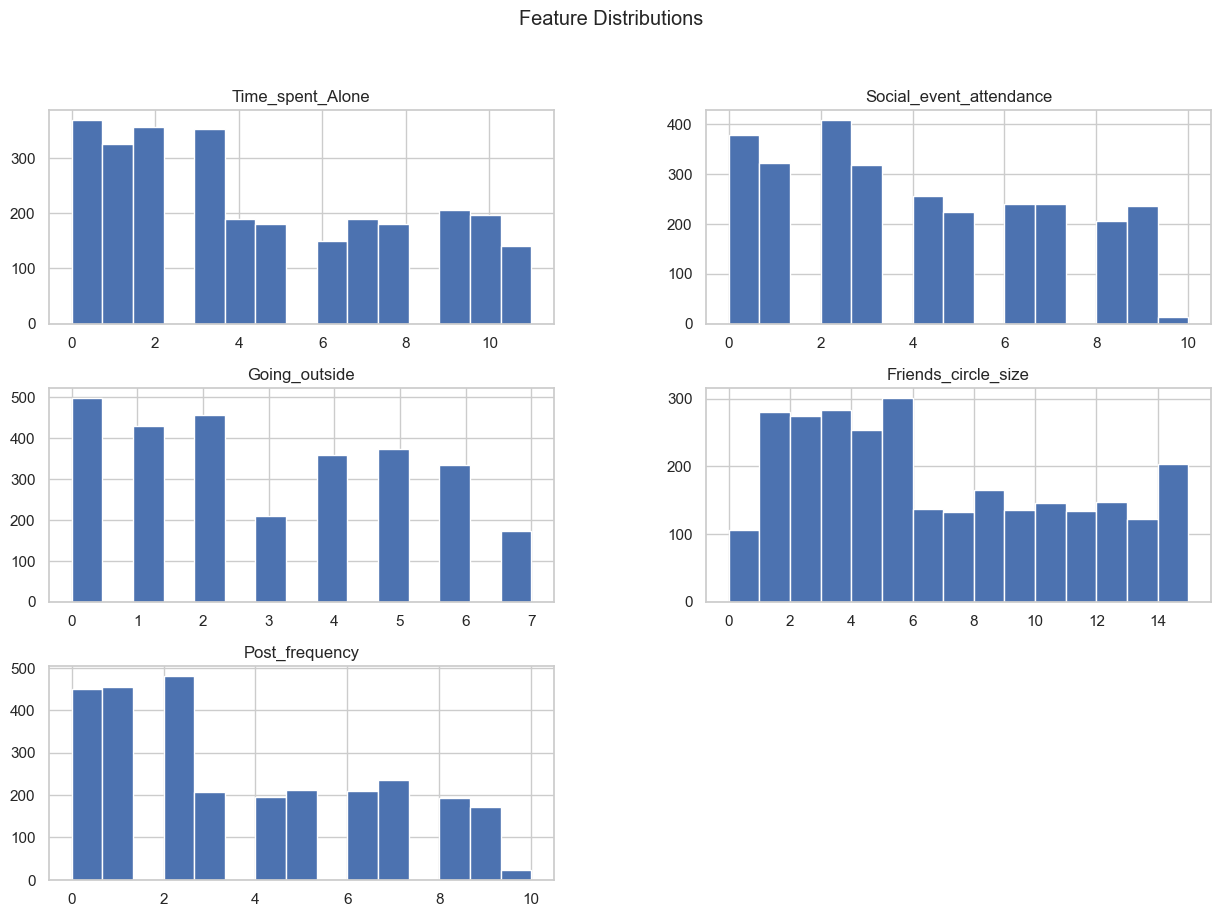

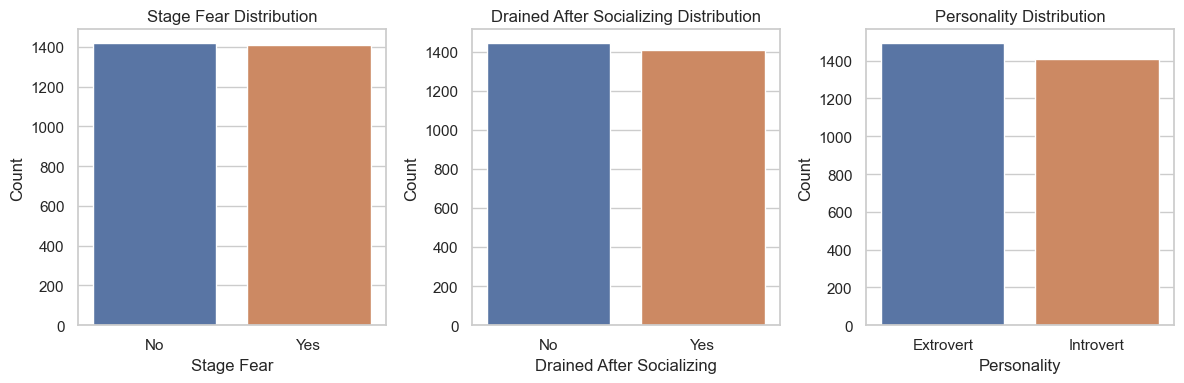

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting visualization style.
sns.set(style="whitegrid")
# Converting categorical variables to numberical for correlation heatmap
personality_viz=personality.copy()
personality_viz['Stage_fear']=personality_viz['Stage_fear'].map({'Yes':1,'No':0})
personality_viz['Drained_after_socializing']=personality_viz['Drained_after_socializing'].map({'Yes':1,'No':0})
personality_viz['Personality']=personality_viz['Personality'].map({'Extrovert':1,'Introvert':0})
# Plotting Correlation Heatmap
sns.heatmap(personality_viz.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
# Plot distributions of numeric features
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
personality_viz[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()
# Visualizing categorical values.
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x='Stage_fear', data=personality, ax=axes[0])
axes[0].set_title('Stage Fear Distribution')
axes[0].set_xlabel('Stage Fear')
axes[0].set_ylabel('Count')

sns.countplot(x='Drained_after_socializing', data=personality, ax=axes[1])
axes[1].set_title('Drained After Socializing Distribution')
axes[1].set_xlabel('Drained After Socializing')
axes[1].set_ylabel('Count')

sns.countplot(x='Personality', data=personality, ax=axes[2])
axes[2].set_title('Personality Distribution')
axes[2].set_xlabel('Personality')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()



In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode binary categorical features as 0/1
personality['Stage_fear']=personality['Stage_fear'].map({'Yes':1,'No':0})
personality['Drained_after_socializing']=personality['Drained_after_socializing'].map({'Yes':1,'No':0})
# Encode target variable
label_encoder=LabelEncoder()
personality['Personality']=label_encoder.fit_transform(personality['Personality'])

In [8]:
# Applying z-score standardization
# Selecting numeric features 
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
scaler=StandardScaler()
# Fit and transform numeric columns
personality[numeric_cols]=scaler.fit_transform(personality[numeric_cols])
personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.145409,0.0,0.012622,1.335155,0.0,1.569420,0.490513,0
1,1.291960,1.0,-1.365113,-1.335155,1.0,-1.461637,-0.192999,1
2,1.291960,1.0,-1.020679,-0.445052,1.0,-0.295846,-0.534754,1
3,-1.295304,0.0,0.701490,1.780207,0.0,1.802578,1.515781,0
4,-0.432882,0.0,1.734791,0.445052,0.0,0.403629,0.490513,0


In [11]:
# Re-droping as after standardization , NaN may be reintroduced due to column dtype issues or incorrect indexing
personality=personality.dropna()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
x=personality.drop('Personality',axis=1)
# y is the target variable
y=personality['Personality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
# Replace numeric output with labels
output_label=['Introvert' if label ==0 else 'Extrovert' for label in y_pred]
print(output_label)
# Evaluation of model
print("classification report:\n",classification_report(y_test,y_pred))
print('\n Confusion matrix:',confusion_matrix(y_test,y_pred))


['Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert'

In [25]:
import numpy as np
# Define the input function
def predict_personality():
    print("🔍 Please enter the following details:")

    # Take inputs from user
    time_spent_alone = float(input("1. Time spent alone (numeric): "))
    social_event_attendance = float(input("2. Social event attendance (numeric): "))
    going_outside = float(input("3. Going outside frequency (numeric): "))
    stage_fear = input("4. Do you have stage fear? (Yes/No): ").strip().capitalize()
    drained_socializing = input("5. Do you feel drained after socializing? (Yes/No): ").strip().capitalize()
    friends_circle_size = float(input("6. Friends circle size (numeric): "))
    post_frequency = float(input("7. Post frequency on social media (numeric): "))

    # Convert categorical inputs to numeric (same as model was trained)
    stage_fear_num = 1 if stage_fear == "Yes" else 0
    drained_socializing_num = 1 if drained_socializing == "Yes" else 0

    # Create feature array (standardize numeric inputs using trained scaler)
    input_data = np.array([[time_spent_alone, social_event_attendance, going_outside,
                            stage_fear_num, drained_socializing_num,
                            friends_circle_size, post_frequency]])

    # Scale the numeric features (use same StandardScaler as training)
    input_data[:, [0,1,2,5,6]] = scaler.transform(input_data[:, [0,1,2,5,6]])

    # Predict
    prediction = dt.predict(input_data)[0]
    result = "Extrovert" if prediction == 1 else "Introvert"

    print(f"\n🧠 Predicted Personality Type: {result}")

# Run it
predict_personality()

🔍 Please enter the following details:
1. Time spent alone (numeric): 12
2. Social event attendance (numeric): 2
3. Going outside frequency (numeric): 2
4. Do you have stage fear? (Yes/No): No
5. Do you feel drained after socializing? (Yes/No): Yes
6. Friends circle size (numeric): 5
7. Post frequency on social media (numeric): 2

🧠 Predicted Personality Type: Introvert


C:\Users\hp\anaconda4\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda4\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
